# Installing and Importing Some Important Library

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import cv2 
import pandas as pd
from keras import Model
from keras.layers import Dense,InputLayer,Dropout,RandomFlip,RandomRotation,Rescaling,Resizing,Layer
from keras.models import Sequential 
from keras.losses import BinaryCrossentropy 
from keras.callbacks import Callback,CSVLogger, EarlyStopping,LearningRateScheduler,ModelCheckpoint,TensorBoard 
from keras.metrics import RootMeanSquaredError,BinaryAccuracy,FalsePositives,FalseNegatives,TruePositives,TrueNegatives,Precision,Recall,AUC
from keras.optimizers import Adam
from keras.regularizers  import L2,L1,l2,l1
import tensorflow_datasets as tfds
import tensorflow_probability as tfp # type: ignore

In [108]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Data Preparation 

as_supervised :If False, the default, the returned tf.data.Dataset will have a dictionary with all the features: When False, it means that instead of a tuple structure, the dataset will be returned as a dictionary where keys represent different features of the data (including both inputs and labels if available). 

as_supervised:2-tuple structure (input, label): When True, it means that the dataset will be returned as a tuple where the first element contains the input data (features) and the second element contains the corresponding labels. This is often used in supervised learning scenarios where you have input data and corresponding labels (e.g., images and their associated labels like "cat" or "dog").

# Data Loading 


In [109]:
dataset,dataset_info=tfds.load('malaria',with_info=True,as_supervised=True,shuffle_files=True,split=['train'])

In [110]:
dataset

[<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [111]:
for data in dataset[0].take(4):
    print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(145, 148, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [112]:
dataset[0]

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

# Data Preprocessing 


In [8]:
# train_ratio=0.6
# val_ratio=0.2
# test_ratio=0.2

# dataset=tf.data.Dataset.range(10)
# print(list(dataset.as_numpy_iterator()))
# print(len(dataset))

# #dataset=dataset.skip(6)
# # where skip() used to skip the first six value 
# # dataset=dataset.take(6)
# # list(dataset.as_numpy_iterator())
# datasize=len(dataset)
# training_dataset=dataset.take(int(datasize*train_ratio))
# print(list(training_dataset.as_numpy_iterator()))
# validation_test_dataset=dataset.skip(int(datasize*train_ratio))
# validation_dataset=validation_test_dataset.take(int(val_ratio*datasize))
# print(list(validation_dataset.as_numpy_iterator()))
# test_dataset=validation_test_dataset.skip(int(datasize*val_ratio))
# print(list(test_dataset.as_numpy_iterator()))


In [113]:
def split(dataset,train_ratio,val_ratio,test_ratio):
    datasize=len(dataset)
    training_dataset=dataset.take(int(datasize*train_ratio))
    
    validation_test_dataset=dataset.skip(int(datasize*train_ratio))
    validation_dataset=validation_test_dataset.take(int(val_ratio*datasize))
    
    test_dataset=validation_test_dataset.skip(int(datasize*val_ratio))
    
    return training_dataset,validation_dataset,test_dataset
    

In [114]:
train_ratio=0.8
val_ratio=0.1
test_ratio=0.1
# dataset=tf.data.Dataset.range(10)
training_dataset,validation_dataset,test_dataset=split(dataset[0],train_ratio,val_ratio,test_ratio)
print(list(training_dataset.take(1).as_numpy_iterator()),list(validation_dataset.take(1).as_numpy_iterator()),list(test_dataset.take(1).as_numpy_iterator()))


[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

In [115]:
print(list(training_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)]


The as_numpy_iterator() method in TensorFlow's Dataset API converts the elements of a dataset into numpy arrays.    
  Images are usually represented as Height x Width x #Channels where #Channels is 3 for RGB images and 1 for grayscale images. Sometimes you see Width x Height x #Channels, but the third dimension is the “channels.”

# Data Augmentation

In [116]:
def visualize(original,augmented):
    plt.subplot(1,2,1)
    plt.imshow(original)
    plt.subplot(1,2,2)
    plt.imshow(augmented)

In [117]:
original_image,label=next(iter(training_dataset))

In [118]:
augmented_image=tf.image.flip_left_right(original_image)

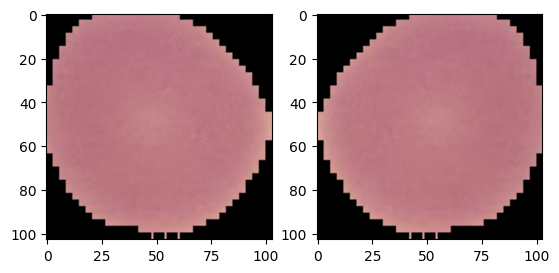

In [119]:
visualize(original_image,augmented_image)

In [120]:
augmented_image2=tf.image.flip_up_down(
    original_image
)

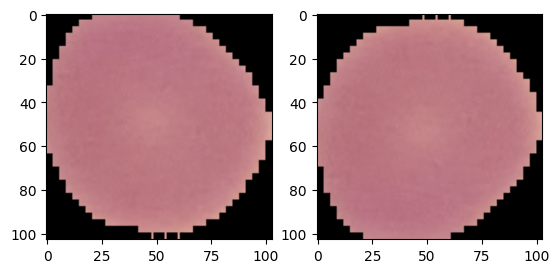

In [121]:
visualize(original_image,augmented_image2)

In [122]:
augmented_image3=tf.image.rot90(
    original_image
)

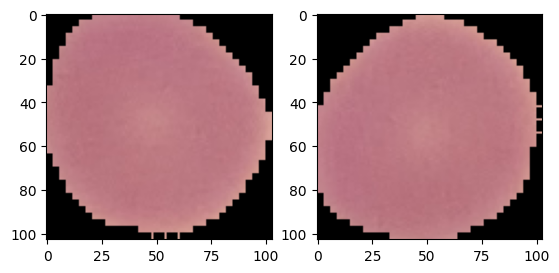

In [123]:
visualize(original_image,augmented_image3)

In [124]:
augmented_image4=tf.image.adjust_brightness(
    original_image,delta=0.2
)

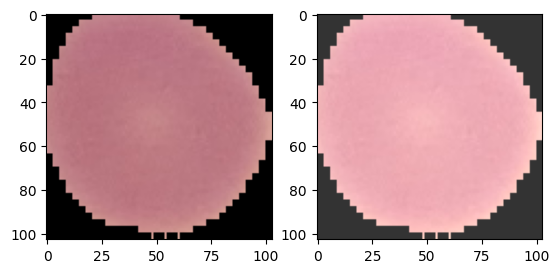

In [125]:
visualize(original_image,augmented_image4)

In [126]:
augmented_image5=tf.image.central_crop(
    original_image,0.8
)

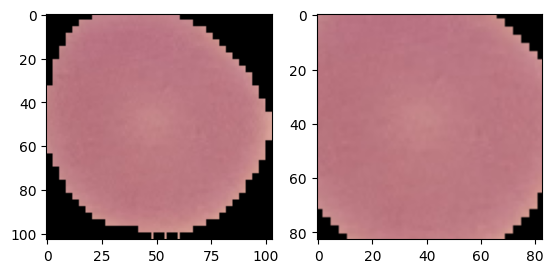

In [127]:
visualize(original_image,augmented_image5)

# Data Visualization 


The enumerate() function in Python is used to iterate over a sequence (such as a list, tuple, or generator) along with an index, which starts from 0 by default.        

The .int2str() method is typically associated with TensorFlow Datasets (TFDS). It's used to convert integer-encoded labels into their corresponding string representations.

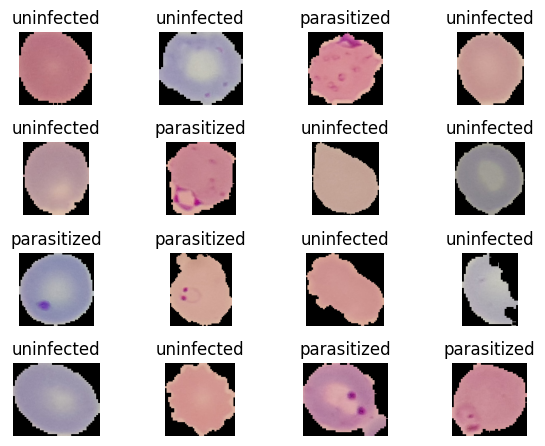

In [128]:
for i ,(image,label) in enumerate(training_dataset.take(16)):
    axes=plt.subplot(4,4,i+1)
    plt.imshow(image)
    plt.tight_layout()
    plt.title(dataset_info.features['label'].int2str(label))
    plt.axis('off')

In [129]:
print(dataset_info.features['label'].int2str(0))
print(dataset_info.features['label'].int2str(1))

parasitized
uninfected


# Data Transforming 

    # image=tf.image.flip_left_right(image)
    # image=tf.image.stateless_random_saturation(image,0.3,0.5)
    
    #tf.image.random_flip_up_down(image, seed=None)

In [130]:
original_image,label=next(iter(training_dataset))


In TensorFlow, the @tf.function decorator is used to convert a Python function into a TensorFlow graph, which allows for optimizations and efficient execution. When a function is decorated with @tf.function, TensorFlow traces the function to build a computation graph the first time it is called. After the graph is built, subsequent calls to the function use this pre-compiled graph instead of executing the Python code again.

In [131]:
IMG_SIZE=224
@tf.function # in graph mode It is dat structure It store the dat struture
def resizing_reskilling(image,label):
     #tf.print make this method a normal method
    return tf.image.resize(image,(IMG_SIZE,IMG_SIZE,))/255.0,label
     # cv.resize() method will one one time in graph mode 


In [28]:
# tf.config.run_functions_eagerly(True)
# _,_=resizing_reskilling(original_image,label)
# _,_=resizing_reskilling(original_image,label)
# _,_=resizing_reskilling(original_image,label)

In [132]:
@tf.function
def random_flip(image):
    # Randomly choose between horizontal or vertical flip
    choice = tf.random.uniform(shape=[], minval=0, maxval=2, dtype=tf.int32)
    image = tf.cond(choice == 0, lambda: tf.image.flip_left_right(image), lambda: tf.image.flip_up_down(image))
    return image

In [133]:
@tf.function
def augment_tf(image,label):
    image,label=resizing_reskilling(image,label)
    image=random_flip(image)
    image=tf.image.rot90(image,k=tf.random.uniform(shape=[],minval=0,maxval=4,dtype=tf.int32))
    image=tf.image.random_brightness(image,max_delta=0.2)
    image=tf.image.random_contrast(image,lower=0.8, upper=1.2)

    return image,label

In [134]:
#tf.keras.layer.resizing_reskilling
resize_rescale_layers=tf.keras.Sequential([
    Resizing(IMG_SIZE,IMG_SIZE),
    Rescaling(1.0/255),
])

In [135]:
class Rot90(Layer):
    def __init__(self):
        super().__init__()
    @tf.function
    def call(self,image):
        return tf.image.rot90(image)  


In [136]:
# keras layer 

# Define the augmentation layer
data_augmentation = tf.keras.Sequential([
    RandomRotation(factor=(0.25, 0.2501)),
    RandomFlip(mode='horizontal')
])

# Define the augmentation function
@tf.function
def augment_image(image, labels):
   
    return data_augmentation(resize_rescale_layers(image), training=True), labels

# Apply the augmentation function to the dataset



# Mixup Data Augmentation

In [137]:
IMG_SIZE=224
lamda=tfp.distributions.Beta(
    0.2,
    0.2,
)
lamda=lamda.sample(1)[0]
image_1=cv2.resize(cv2.imread("image.png"),
                   (IMG_SIZE,IMG_SIZE))
label1=0
print(image_1)
image_2=cv2.resize(cv2.imread("image1.png"),(IMG_SIZE,IMG_SIZE))
label2=1
image=lamda*image_1+(1-lamda)*image_2
label=lamda*label1+(1-lamda)*label2
print(image.shape,label.numpy())

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
(224, 224, 3) 0.6923984


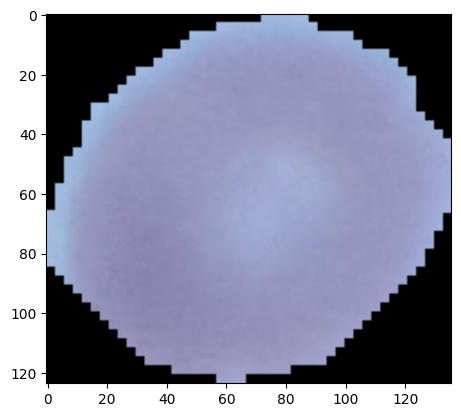

In [138]:
image_test=cv2.imread("image1.png")
plt.imshow(image_test)

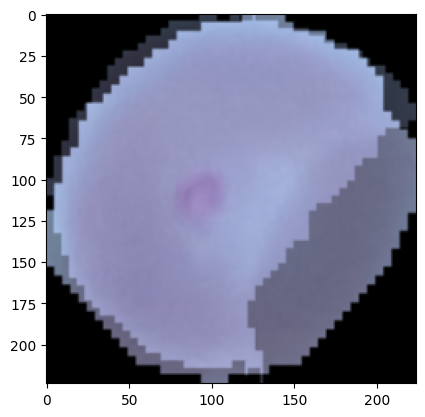

In [139]:
plt.imshow(image/255)

In [37]:
# training_dataset1=training_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).map(resizing_reskilling)
# training_dataset2=training_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).map(resizing_reskilling)
# mixed_dataset=tf.data.Dataset.zip((training_dataset1,training_dataset1))

In [140]:
IMG_SIZE=224
def mixup(training_dataset1,training_dataset2):
    (image_1,label1),(image_2,label2)=training_dataset1,training_dataset2
    lamda=tfp.distributions.Beta(0.4,0.4)
    lamda=lamda.sample(1)[0]
    image=lamda*image_1+(1-lamda)*image_2
    label=lamda*tf.cast(label1,dtype=tf.float32)+(1-lamda)*tf.cast(label2,dtype=tf.float32)+(1-lamda)
    return image,label


# Cutmix 


In [141]:
IMG_SIZE=224



In [143]:
def box(lamda):

    r_x=tf.cast(tfp.distributions.Uniform(0,IMG_SIZE).sample(1)[0],dtype=tf.int32)
    r_y=tf.cast(tfp.distributions.Uniform(0,IMG_SIZE).sample(1)[0],dtype=tf.int32)

    r_w=tf.cast(IMG_SIZE*tf.math.sqrt(1-lamda),dtype=tf.int32)
    r_h=tf.cast(IMG_SIZE*tf.math.sqrt(1-lamda),dtype=tf.int32)

    r_x=tf.clip_by_value(r_x-r_w//2,clip_value_min=0,clip_value_max=IMG_SIZE)
    r_y=tf.clip_by_value(r_y-r_h//2,clip_value_min=0,clip_value_max=IMG_SIZE)

    x_b_r=tf.clip_by_value(r_x+r_w//2,clip_value_min=0,clip_value_max=IMG_SIZE)
    y_b_r=tf.clip_by_value(r_y+r_h//2,clip_value_min=0,clip_value_max=IMG_SIZE)
    r_w=x_b_r-r_x
    if(r_w==0):
        r_w=1

    r_h=y_b_r-r_y
    if(r_h==0):
        r_h=1

    return r_y,r_x,r_h,r_w
    

In [144]:
IMG_SIZE=224
def cutmix(training_dataset1,training_dataset2):
    (image_1,label1),(image_2,label2)=training_dataset1,training_dataset2
    lamda=tfp.distributions.Beta(0.2,0.2)
    lamda=lamda.sample(1)[0]
    r_y,r_x,r_h,r_w=box(lamda)
    crop2=tf.image.crop_to_bounding_box(image_2,r_y,r_x,r_h,r_w)  # 20,100,100,98 bounding box
    pad2=tf.image.pad_to_bounding_box(crop2,r_y,r_x,IMG_SIZE,IMG_SIZE)
    crop1=tf.image.crop_to_bounding_box(image_1,r_y,r_x,r_h,r_w)
    pad1=tf.image.pad_to_bounding_box(crop1,r_y,r_x,IMG_SIZE,IMG_SIZE)
    image=image_1-pad1+pad2
    lamda=tf.cast(1-(r_w*r_h)/(IMG_SIZE*IMG_SIZE),dtype=tf.float32)
    label=lamda*tf.cast(label1,dtype=tf.float32)+(1-lamda)*tf.cast(label2,dtype=tf.float32)
    
   
    return image,label


# Data Albumenatation


In [145]:
import albumentations as A

In [146]:
transform=A.Compose([
    A.Resize(IMG_SIZE,IMG_SIZE),

    
    A.OneOf([A.HorizontalFlip(),A.VerticalFlip(),],p=0.3),


    A.RandomRotate90(),


    # A.RandomGridShuffle(grid=(3,3),always_apply=False,p=0.5),


    A.RandomBrightnessContrast(brightness_limit=0.1,contrast_limit=0.1,always_apply=False,p=0.5),


    #A.CoarseDropout (max_holes=5, max_height=8, max_width=8, min_holes=0, min_height=None, min_width=None, fill_value=0, mask_fill_value=None, num_holes_range=(1, 1), hole_height_range=(8, 8), hole_width_range=(8, 8), always_apply=False, p=0.5)


    # A.Sharpen(alpha=(0.2,0.5),lightness=(0.5,1.0),p=0.5)

    
])

In [147]:

def aug_albument(image):
    data={"image":image}
    image=transform(**data)
    image=image['image']
    image=tf.cast(image/255.,tf.float32)
    return image

In [148]:

def process_data(image,label):
    aug_img=tf.numpy_function(func=aug_albument,inp=[image],Tout=tf.float32)
    return aug_img,label

In [149]:

training_dataset=(training_dataset
                 .shuffle(buffer_size=8,reshuffle_each_iteration=True)
                 .map(process_data)
                  .batch(32)
                  .prefetch(tf.data.AUTOTUNE)
)

In [150]:
validation_dataset=validation_dataset.map(resizing_reskilling)
validation_dataset=validation_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(1).prefetch(tf.data.AUTOTUNE)

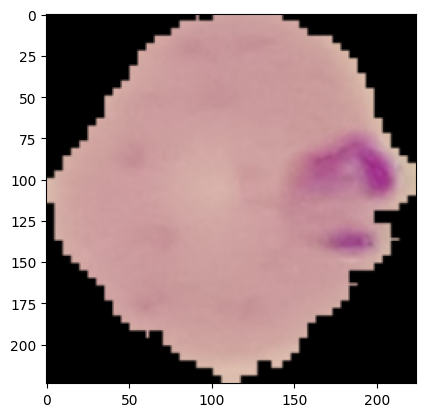

In [151]:
img,l=next(iter(training_dataset))
plt.imshow(img[0])

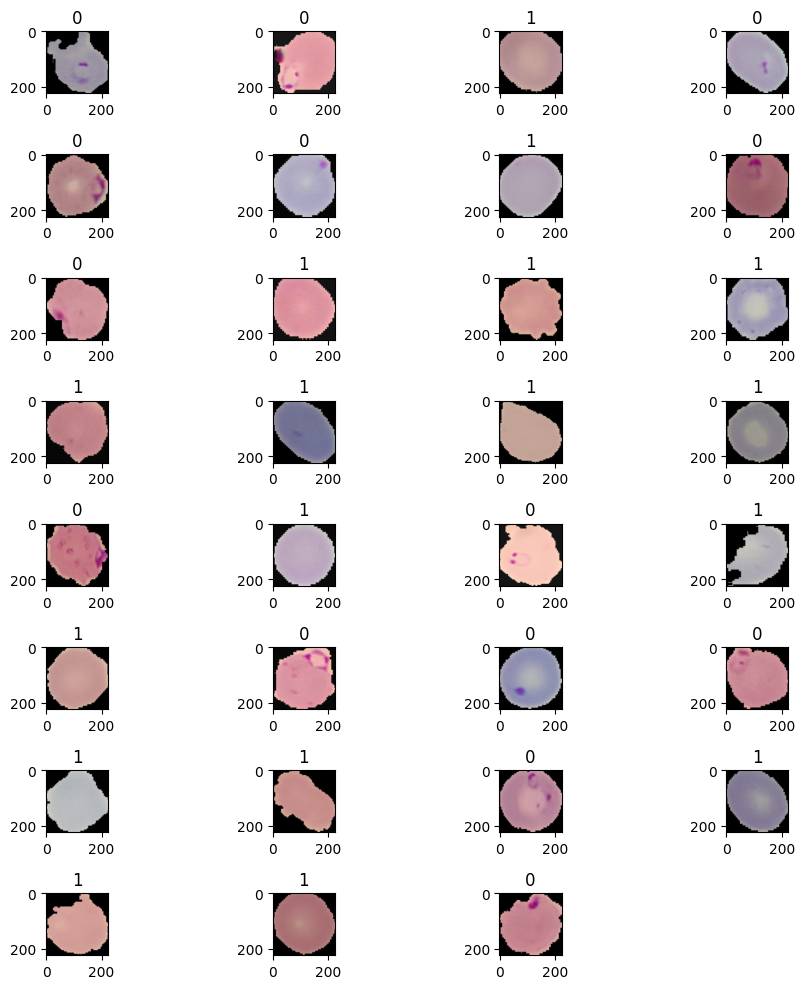

In [152]:
plt.figure(figsize=(10,10))
for i in range(1,32):
    plt.subplot(8,4,i)
    plt.imshow(img[i])
    plt.title(l[i].numpy())
    plt.tight_layout()
   

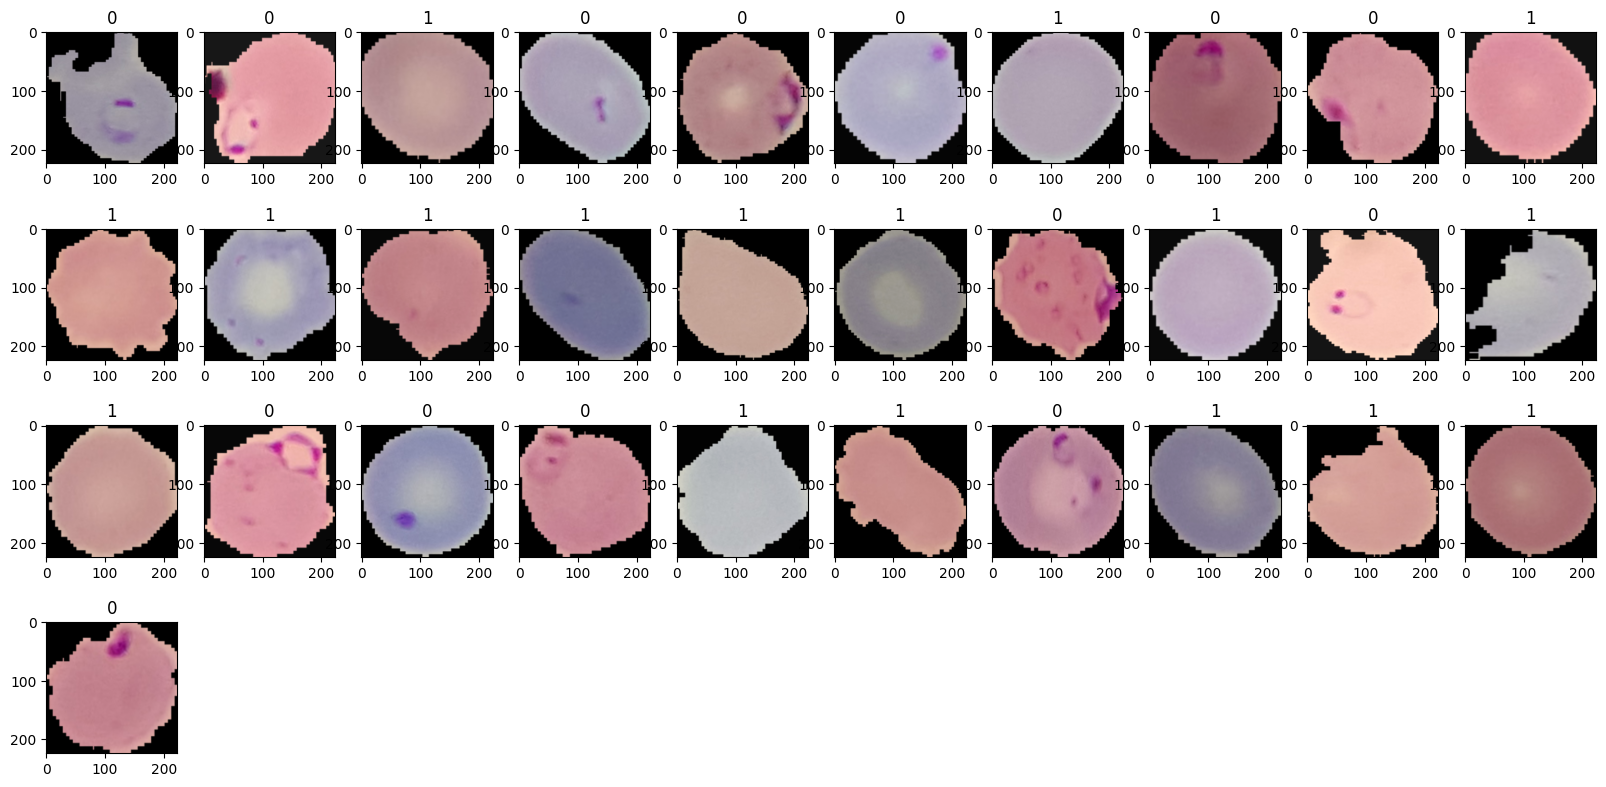

In [153]:
plt.figure(figsize=(20,20))
for i in range(1,32):
    plt.subplot(8,10,i)
    plt.imshow(img[i])
    plt.title(l[i].numpy())

In [154]:
for image , label in training_dataset.take(1):
    print(image)

tf.Tensor(
[[[[0.03921569 0.03921569 0.03921569]
   [0.03921569 0.03921569 0.03921569]
   [0.03921569 0.03921569 0.03921569]
   ...
   [0.03921569 0.03921569 0.03921569]
   [0.03921569 0.03921569 0.03921569]
   [0.03921569 0.03921569 0.03921569]]

  [[0.03921569 0.03921569 0.03921569]
   [0.03921569 0.03921569 0.03921569]
   [0.03921569 0.03921569 0.03921569]
   ...
   [0.03921569 0.03921569 0.03921569]
   [0.03921569 0.03921569 0.03921569]
   [0.03921569 0.03921569 0.03921569]]

  [[0.03921569 0.03921569 0.03921569]
   [0.03921569 0.03921569 0.03921569]
   [0.03921569 0.03921569 0.03921569]
   ...
   [0.03921569 0.03921569 0.03921569]
   [0.03921569 0.03921569 0.03921569]
   [0.03921569 0.03921569 0.03921569]]

  ...

  [[0.03921569 0.03921569 0.03921569]
   [0.03921569 0.03921569 0.03921569]
   [0.03921569 0.03921569 0.03921569]
   ...
   [0.03921569 0.03921569 0.03921569]
   [0.03921569 0.03921569 0.03921569]
   [0.03921569 0.03921569 0.03921569]]

  [[0.03921569 0.03921569 0.039215

# Model Development

In [155]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization# type: ignore


https://cs.stanford.edu/people/karpathy/convnetjs/demo/mnist.html

https://cs231n.github.io/convolutional-networks

/
https://poloclub.github.io/cnn-explainer/

With your diagram, each row is essentially a layer. But as @beaker states it is not the best way to visualize a neural network.

Taking an image from here will help make this clear.

enter image description here

Layer is a general term that applies to a collection of 'nodes' operating together at a specific depth within a neural network.

The input layer is contains your raw data (you can think of each variable as a 'node').

The hidden layer(s) are where the black magic happens in neural networks. Each layer is trying to learn different aspects about the data by minimizing an error/cost function. The most intuitive way to understand these layers is in the context of 'image recognition' such as a face. The first layer may learn edge detection, the second may detect eyes, third a nose, etc. This is not exactly what is happening but the idea is to break the problem up in to components that different levels of abstraction can piece together much like our own brains work (hence the name 'neural networks').

The output layer is the simplest, usually consisting of a single output for classification problems. Although it is a single 'node' it is still considered a layer in a neural network as it could contain multiple nodes.

# Sequential API

In [156]:
droprate=0.3
Regularize_rate=0.01
model=tf.keras.Sequential([
    
    InputLayer(input_shape=(IMG_SIZE,IMG_SIZE,3)),
    tf.keras.layers.Conv2D(filters=6,kernel_size=3,strides=1,padding='valid',activation='relu',kernel_regularizer=L2(0.01)),
    BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2),
    Dropout(rate=0.3),

    tf.keras.layers.Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu',kernel_regularizer=L2(0.02)),
    BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2),
    
    
    Flatten(),
    

    Dense(100,activation="relu",kernel_regularizer=L2(0.01)),
    BatchNormalization(),
    Dropout(rate=0.3),
    
    Dense(10,activation="relu",kernel_regularizer=L2(0.01)),
    BatchNormalization(),
    Dense(1,activation="sigmoid"),

    
])
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_20 (Bat  (None, 222, 222, 6)      24        
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 6)      0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 111, 111, 6)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_21 (Bat  (None, 109, 109, 16)    

# Functional API

In [157]:
from tensorflow.keras.models import Model # type: ignore
from tensorflow.keras.layers import Input, Conv2D,Layer # type: ignore

# Feature Extractor

In [159]:
function1=Input(shape=(IMG_SIZE,IMG_SIZE,3),name="Input_Image")
x1=Conv2D(filters=6,kernel_size=3,strides=1,padding='valid',activation='relu')(function1)
x1=BatchNormalization()(x1)
x1=MaxPool2D(pool_size=2,strides=2)(x1)

x1=Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu')(x1)
x1=BatchNormalization()(x1)
output=MaxPool2D(pool_size=2,strides=2)(x1)

feature_extractor_model2=Model(function1,output,name="Feature_extractor")
feature_extractor_model2.summary()


Model: "Feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_26 (Bat  (None, 222, 222, 6)      24        
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 111, 111, 6)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_27 (Bat  (None, 109, 109, 16

In [ ]:
function=Input(shape=(IMG_SIZE,IMG_SIZE,3),name="Input_Image")
x=feature_extractor_model2(function)
x=Flatten()(x)

x=Dense(100,activation='relu')(x)
x=BatchNormalization()(x)

x=Dense(10,activation='relu')(x)
x=BatchNormalization()(x)
function_output=Dense(1,activation='sigmoid')(x)
lenet_model=Model(function,function_output,name="lenet_model")
lenet_model.summary()


Model: "lenet_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Feature_extractor (Function  (None, 54, 54, 16)       1136      
 al)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 46656)             0         
                                                                 
 dense_3 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_6 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 10)                

: 

# Model Subclassing


In [158]:
class FeatureExtractor(Layer):
    
    def __init__(self, filters, kernel_size, strides, padding, activation, pool_size):
        super(FeatureExtractor, self).__init__()
        
        self.conv_1 = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding, activation=activation)
        self.batch_1 = BatchNormalization()
        self.pool_1 = MaxPool2D(pool_size=pool_size, strides=2*strides)  # Check if this stride behavior is intended
        
        self.conv_2 = Conv2D(filters=filters*2, kernel_size=kernel_size, strides=strides, padding=padding, activation=activation)
        self.batch_2 = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=pool_size, strides=2*strides)  # Check if this stride behavior is intended
        
    def call(self, x, training):
        x = self.conv_1(x)
        x = self.batch_1(x)
        x = self.pool_1(x)
        x = self.conv_2(x)
        x = self.batch_2(x)
        x = self.pool_2(x)
        return x


feature_sub_classed = FeatureExtractor(filters=8, kernel_size=3, strides=1, padding="valid", activation="relu", pool_size=2)

    

        

    


In [160]:
function2=Input(shape=(IMG_SIZE,IMG_SIZE,3),name="Input_Image")
x2=feature_sub_classed(function)
x2=Flatten()(x2)

x2=Dense(100,activation='relu')(x2)
x2=BatchNormalization()(x2)

x2=Dense(10,activation='relu')(x2)
x2=BatchNormalization()(x2)
function_output=Dense(1,activation='sigmoid')(x2)
lenet_model2=Model(function,function_output,name="lenet_model")
lenet_model2.summary()

Model: "lenet_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 feature_extractor_2 (Featur  (None, 54, 54, 16)       1488      
 eExtractor)                                                     
                                                                 
 flatten_6 (Flatten)         (None, 46656)             0         
                                                                 
 dense_15 (Dense)            (None, 100)               4665700   
                                                                 
 batch_normalization_28 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            (None, 10)                

In [161]:

class LENET_MODEL(Model):
    def __init__(self, filters=8, kernel_size=3, strides=1, padding="valid", activation="relu", pool_size=2):
        super(LENET_MODEL, self).__init__()
        
        self.feature_extractor = FeatureExtractor(filters, kernel_size, strides, padding, activation, pool_size)
        self.flatten = Flatten()
        self.dense_1 = Dense(100, activation='relu')
        self.batch_1 = BatchNormalization()
        self.dense_2 = Dense(10, activation='relu')
        self.batch_2 = BatchNormalization()
        self.dense_3 = Dense(1, activation='sigmoid')
        
    def call(self, x, training):
        x = self.feature_extractor(x, training=training)
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.batch_1(x)
        x = self.dense_2(x)
        x = self.batch_2(x)
        x = self.dense_3(x)
        return x

LENET_sub_classed =LENET_MODEL()
LENET_sub_classed(tf.zeros([1,224,224,3]))
LENET_sub_classed.summary()



        

    


Model: "lenet_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_3 (Featur  multiple                 1488      
 eExtractor)                                                     
                                                                 
 flatten_7 (Flatten)         multiple                  0         
                                                                 
 dense_18 (Dense)            multiple                  4665700   
                                                                 
 batch_normalization_32 (Bat  multiple                 400       
 chNormalization)                                                
                                                                 
 dense_19 (Dense)            multiple                  1010      
                                                                 
 batch_normalization_33 (Bat  multiple               

# Custom Layer 

In [162]:
class Malaria_Dense_Layer(Layer):
    def __init__(self,output_unit,activation,regularize=None):
        super(Malaria_Dense_Layer,self).__init__()
        self.output_unit=output_unit
        self.activation=activation
        self.regularization=regularize
    def build(self,input_features_shape):
        self.w=self.add_weight(shape=(input_features_shape[-1],self.output_unit),initializer="random_normal",trainable=True,name='name',regularizer=l2(self.regularization) if self.regularization else None)
        self.b=self.add_weight(shape=(self.output_unit,),initializer="random_normal",trainable=True,name='name')
    def call(self,input_features):
        if(self.activation=="relu"):
            return tf.nn.relu(tf.matmul(input_features,self.w)+self.b)
        
        elif(self.activation=="sigmoid"):
            return tf.math.sigmoid(tf.matmul(input_features,self.w)+self.b)
        else:
            tf.matmul(input_features,self.w)+self.b
        
        

In [163]:
# droprate=0.1
Custom_model=tf.keras.Sequential([
    InputLayer(input_shape=(IMG_SIZE,IMG_SIZE,3)),

    tf.keras.layers.Conv2D(filters=6,kernel_size=3,strides=1,padding='valid',activation='relu',),
    BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2),
    
    
    

    tf.keras.layers.Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu',),
    BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2),
    
    
    
    Flatten(),
    

    Malaria_Dense_Layer(200,activation="relu"),
    BatchNormalization(),
    
    Malaria_Dense_Layer(30,activation="relu"),
    BatchNormalization(),
    Malaria_Dense_Layer(1,activation="sigmoid"),

    
])
Custom_model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_34 (Bat  (None, 222, 222, 6)      24        
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 111, 111, 6)      0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_35 (Bat  (None, 109, 109, 16)     64        
 chNormalization)                                                
                                                      

In [164]:
y_t=[0,1,0,1]
y_p=[0.8,0.9,0.2,0]
y_t = np.array(y_t, dtype=np.float32)
y_p = np.array(y_p, dtype=np.float32)
bce=tf.keras.losses.BinaryCrossentropy(from_logits=False)
bce(y_t,y_p)

<tf.Tensor: shape=(), dtype=float32, numpy=4.3407226>

# Callbacks

In [165]:
class LossCallback(Callback):
    def on_epoch_end(self,epoch,logs):
        print("\n for Epoch Number {} the model has loss of {}".format(epoch+1,logs["loss"]))
    def on_batch_end(self,batch,logs):
        print("\n for batch Number {} the model has loss of {}".format(batch+1,logs))

# LearningRateScheduler

In [166]:
def scheduler(epoch,lr):
    if epoch<=2 :
        return lr
    else:
        return lr* tf.math.exp(-0.1)
scheduler_callback=LearningRateScheduler(scheduler,verbose=1)

In [167]:
csv_callback=CSVLogger('log1s.csv',separator=',',append=False)

# Early Stopping

In [168]:
early_stopping=EarlyStopping(monitor='val_accuracy',min_delta=0,patience=4,verbose=1,mode='auto',baseline=None,restore_best_weights=True)

# ReduceLROnPlateau

In [169]:
plateau_callback=tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.1,
    patience=2,
    verbose=0,
    mode='auto',
    min_delta=0.001,
    cooldown=0,
    min_lr=0,
    
)

# Model Checkpointing


In [170]:
checkpoint_callback = ModelCheckpoint(filepath='Model_checkpoint/',
                                      monitor='val_accuracy',
                                      verbose=0,
                                      save_best_only=True,
                                      save_weights_only=False,
                                      mode='auto',
                                      save_freq='epoch')

# Custom Accuracy Class 


In [171]:
from tensorflow.keras.metrics import Metric ,binary_accuracy

In [173]:

class CustomAccuracy(Metric):
    def __init__(self, factor=1.0, name='custom_accuracy', **kwargs):
        super(CustomAccuracy, self).__init__(name=name, **kwargs)
        self.factor = factor
        self.total = self.add_weight(name='total', initializer='zeros')
        self.count = self.add_weight(name='count', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Ensure y_true and y_pred are of the same dtype
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)
        
        accuracy = binary_accuracy(y_true, y_pred)
        accuracy = tf.cast(accuracy, self.dtype)
        if sample_weight is not None:
            sample_weight = tf.cast(sample_weight, self.dtype)
            accuracy = tf.multiply(accuracy, sample_weight)
        self.total.assign_add(tf.reduce_sum(accuracy))
        self.count.assign_add(tf.reduce_sum(tf.ones_like(accuracy)))

    def result(self):
        return (self.total / self.count) * self.factor

    def reset_states(self):
        self.total.assign(0)
        self.count.assign(0)






# Custom Loss Class Method 

In [174]:
class CustomBinaryCrossEntropy(tf.keras.losses.Loss):
    def __init__(self, Factor):
        super(CustomBinaryCrossEntropy, self).__init__()
        self.Factor = Factor

    def call(self, y_true, y_pred):
        bce = BinaryCrossentropy()
        return bce(y_true, y_pred) * self.Factor



# super method

In [175]:
class Parent:
    def __init__(self, name):
        self.name = name
        print(f"Parent initialized with name: {self.name}")

    def greet(self):
        print(f"Hello from {self.name}")

class Child(Parent):
    def __init__(self, name, age):
        super().__init__(name)  # Call the __init__ method of the Parent class
        self.age = age
        print(f"Child initialized with name: {self.name} and age: {self.age}")

    def greet(self):
        super().greet()  # Call the greet method of the Parent class
        print(f"{self.name} is {self.age} years old")

# Create an instance of Child
child = Child("Alice", 10)
child.greet()

Parent initialized with name: Alice
Child initialized with name: Alice and age: 10
Hello from Alice
Alice is 10 years old


# Custom Loss Method(with parameters)

In [176]:
Factor=1
def custom_bce(Factor=1):
    def loss(y_true,y_pred):
        bce=BinaryCrossentropy()
        return bce(y_true,y_pred)*Factor
    return loss

# Custom_bce(without parameters)

In [74]:
# def custom_bce():
#     bce=BinaryCrossentropy()
#     return bce(y_true,y_pred)

# Custom Metric Method

In [177]:
def custom_accuracy(y_true,y_pred):
    return binary_accuracy(y_true,y_pred)

In [178]:

def custom_accuracy_with_factor(factor):
    def metric(y_true,y_pred):
        return binary_accuracy(y_true,y_pred)*factor
    return metric

# Tensorboard


In [179]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir='./log')

In [180]:
metrics=[TruePositives(name='tp'),FalsePositives(name='fp'),TrueNegatives(name='tn'),FalseNegatives(name='fn'),BinaryAccuracy(name='accuracy'),Precision(name='precision'),Recall(name='recall'),AUC(name='auc')]

In [181]:
model.compile(optimizer=Adam(learning_rate=0.001),loss=BinaryCrossentropy(),metrics=metrics)

In [80]:
# with tf.device('/GPU:0'):
#     a=Custom_model.fit(training_dataset,validation_data=validation_dataset,epochs=10,verbose=1,callbacks=[csv_callback,early_stopping,scheduler_callback,checkpoint_callback])

In [182]:
with tf.device('/GPU:0'):
    a=model.fit(training_dataset,validation_data=validation_dataset,epochs=35,callbacks=[tensorboard_callback,csv_callback,early_stopping,checkpoint_callback],verbose=1)
    


Epoch 1/35
689/689 [==============================] - ETA: 0s - loss: 1.1573 - tp: 9349.0000 - fp: 1947.0000 - tn: 9073.0000 - fn: 1677.0000 - accuracy: 0.8356 - precision: 0.8276 - recall: 0.8479 - auc: 0.9058

INFO:tensorflow:Assets written to: Model_checkpoint\assets


INFO:tensorflow:Assets written to: Model_checkpoint\assets


689/689 [==============================] - 103s 142ms/step - loss: 1.1573 - tp: 9349.0000 - fp: 1947.0000 - tn: 9073.0000 - fn: 1677.0000 - accuracy: 0.8356 - precision: 0.8276 - recall: 0.8479 - auc: 0.9058 - val_loss: 0.9027 - val_tp: 1359.0000 - val_fp: 479.0000 - val_tn: 892.0000 - val_fn: 25.0000 - val_accuracy: 0.8171 - val_precision: 0.7394 - val_recall: 0.9819 - val_auc: 0.9477
Epoch 2/35
689/689 [==============================] - 94s 137ms/step - loss: 0.7979 - tp: 10528.0000 - fp: 1323.0000 - tn: 9699.0000 - fn: 496.0000 - accuracy: 0.9175 - precision: 0.8884 - recall: 0.9550 - auc: 0.9433 - val_loss: 1.1371 - val_tp: 1381.0000 - val_fp: 636.0000 - val_tn: 725.0000 - val_fn: 13.0000 - val_accuracy: 0.7644 - val_precision: 0.6847 - val_recall: 0.9907 - val_auc: 0.9501
Epoch 3/35
689/689 [==============================] - ETA: 0s - loss: 0.7529 - tp: 10522.0000 - fp: 1227.0000 - tn: 9792.0000 - fn: 505.0000 - accuracy: 0.9214 - precision: 0.8956 - recall: 0.9542 - auc: 0.9456

INFO:tensorflow:Assets written to: Model_checkpoint\assets


INFO:tensorflow:Assets written to: Model_checkpoint\assets


689/689 [==============================] - 89s 129ms/step - loss: 0.7529 - tp: 10522.0000 - fp: 1227.0000 - tn: 9792.0000 - fn: 505.0000 - accuracy: 0.9214 - precision: 0.8956 - recall: 0.9542 - auc: 0.9456 - val_loss: 0.7386 - val_tp: 1362.0000 - val_fp: 241.0000 - val_tn: 1125.0000 - val_fn: 27.0000 - val_accuracy: 0.9027 - val_precision: 0.8497 - val_recall: 0.9806 - val_auc: 0.9622
Epoch 4/35
689/689 [==============================] - 87s 126ms/step - loss: 0.7908 - tp: 10465.0000 - fp: 982.0000 - tn: 10041.0000 - fn: 558.0000 - accuracy: 0.9301 - precision: 0.9142 - recall: 0.9494 - auc: 0.9554 - val_loss: 0.8752 - val_tp: 1383.0000 - val_fp: 326.0000 - val_tn: 1022.0000 - val_fn: 24.0000 - val_accuracy: 0.8730 - val_precision: 0.8092 - val_recall: 0.9829 - val_auc: 0.9614
Epoch 5/35
689/689 [==============================] - 94s 136ms/step - loss: 0.8382 - tp: 10456.0000 - fp: 922.0000 - tn: 10097.0000 - fn: 571.0000 - accuracy: 0.9323 - precision: 0.9190 - recall: 0.9482 - auc: 

In [184]:
model.save('my_model.h5')

# Fit from strech

In [ ]:
optimizer=Adam(learning_rate=0.01)
epochs=3
custom_loss = custom_bce(1)
METRICS=BinaryAccuracy()
METRICS_val=BinaryAccuracy()

for epoch in range(epochs):
    print({"Training start for epoches number{}".format(epoch+1)})
    for step,(x_batch, y_batch) in enumerate(training_dataset):
        with tf.GradientTape() as recorder:
            y_pred = model(x_batch, training=True)
            loss = custom_loss(y_batch, y_pred) # here we are recording the gradient in this tape 
            
        # Compute gradients #this mean del(loss)/del(Q)
        partial_derivatives = recorder.gradient(loss, model.trainable_weights)
        
        # Apply gradients to update the model parameters
        #this means Q-LR*del(loss)/del(Q)
        optimizer.apply_gradients(zip(partial_derivatives, model.trainable_weights))
        METRICS.update_state(y_batch,y_pred)
        
        # Print the loss for monitoring
    
    print("The Training loss :",loss)
    print("the accuracy is : ",METRICS.result())
    METRICS.reset_states()
        
    
    for steps ,(x_batch_val,y_batch_val) in enumerate(validation_dataset):
        y_pred_val=model(x_batch_val,training=True)
        val_loss=custom_loss(y_batch_val,y_pred_val)
        METRICS_val.update_state(y_batch_val,y_pred_val)
    print("The validation accuracy is :",METRICS_val.result())
    METRICS_val.reset_states()
    print("Validation Loss :",val_loss)
    print("________________________________________________________________")



In [ ]:
@tf.function
def training_block(x_batch,y_batch):
    with tf.GradientTape() as recorder:
        y_pred = model(x_batch, training=True)
        loss = custom_loss(y_batch, y_pred) # here we are recording the gradient in this tape 
            
        # Compute gradients 
        # #this mean del(loss)/del(Q)

    partial_derivatives = recorder.gradient(loss, model.trainable_weights)
        
    # Apply gradients to update the model parameters
    #this means Q-LR*del(loss)/del(Q)
    
    optimizer.apply_gradients(zip(partial_derivatives, model.trainable_weights))
    # Update the metrics
    METRICS.update_state(y_batch,y_pred)

    return loss  # Return the loss for monitoring purposes

        
    


In [ ]:
@tf.function
def validation_block(x_batch_val,y_batch_val):

    y_pred_val=model(x_batch_val,training=True)
    val_loss=custom_loss(y_batch_val,y_pred_val)
    METRICS_val.update_state(y_batch_val,y_pred_val)
    return val_loss


In [ ]:

def fitts(model,optimizer,epochs,custom_loss,METRICS,METRICS_val,training_dataset,validation_dataset):
    for epoch in range(epochs):
        print({"Training start for epoches number{}".format(epoch+1)})
        for step,(x_batch, y_batch) in enumerate(training_dataset):
            loss=training_block(x_batch,y_batch)
            
        # Print the loss for monitoring
        print("The Training loss :",loss)
        print("the accuracy is : ",METRICS.result())
        METRICS.reset_states()
            
        
        
        for steps ,(x_batch_val,y_batch_val) in enumerate(validation_dataset):
            val_loss=validation_block(x_batch_val,y_batch_val)
        print("The validation accuracy is :",METRICS_val.result())
        METRICS_val.reset_states()
        print("Validation Loss :",val_loss)
        print("________________________________________________________________")



In [ ]:
optimizer=Adam(learning_rate=0.01)
epochs=3
custom_loss = custom_bce(1)
METRICS=BinaryAccuracy()
METRICS_val=BinaryAccuracy()
fitts(model,optimizer,epochs,custom_loss,METRICS,METRICS_val,training_dataset,validation_dataset)

{'Training start for epoches number1'}
The Training loss : tf.Tensor(0.60124373, shape=(), dtype=float32)
the accuracy is :  tf.Tensor(0.64288306, shape=(), dtype=float32)
The validation accuracy is : tf.Tensor(0.50344825, shape=(), dtype=float32)
Validation Loss : tf.Tensor(0.68463326, shape=(), dtype=float32)
________________________________________________________________
{'Training start for epoches number2'}
The Training loss : tf.Tensor(0.3691719, shape=(), dtype=float32)
the accuracy is :  tf.Tensor(0.81026036, shape=(), dtype=float32)
The validation accuracy is : tf.Tensor(0.4907441, shape=(), dtype=float32)
Validation Loss : tf.Tensor(0.8122394, shape=(), dtype=float32)
________________________________________________________________
{'Training start for epoches number3'}
The Training loss : tf.Tensor(0.2718902, shape=(), dtype=float32)
the accuracy is :  tf.Tensor(0.9210741, shape=(), dtype=float32)
The validation accuracy is : tf.Tensor(0.49582577, shape=(), dtype=float32)
V

# visualisation 

In [95]:
%reload_ext tensorboard

In [96]:
%tensorboard --logdir {'./log'} --host=127.0.0.1


Reusing TensorBoard on port 6006 (pid 17240), started 0:00:04 ago. (Use '!kill 17240' to kill it.)

In [185]:
def parasited_or_not(x):
    if(x<0.5):
        return str('Parasitic')
    else:
        return str("UnParasitic")
        

(118, 103, 3)
(1, 118, 103, 3)
(1, 224, 224, 3)
1/1 [==============================] - 0s 214ms/step


array([[0.91664994]], dtype=float32)

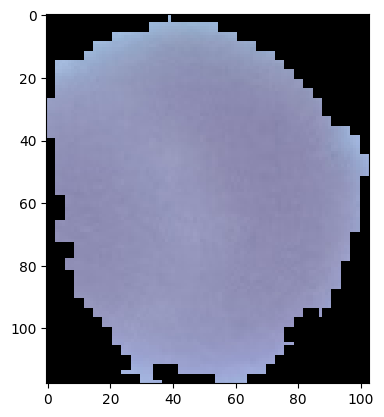

In [186]:
image=cv2.imread('image3 (3).png')
print(image.shape)
plt.imshow(image)
image=tf.expand_dims(image,axis=0)
print(image.shape)
image=tf.image.resize(image,(IMG_SIZE,IMG_SIZE))/224
print(image.shape)
model.predict(image)


(118, 103, 3)
(1, 118, 103, 3)
(1, 224, 224, 3)
1/1 [==============================] - 0s 25ms/step
UnParasitic


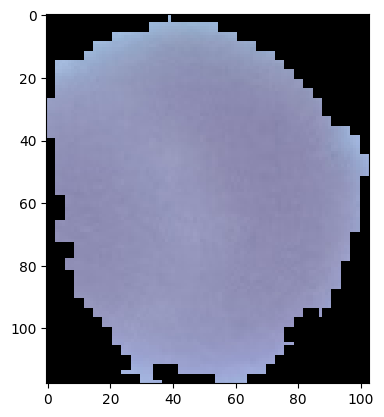

In [187]:
image=cv2.imread('image3 (3).png')
print(image.shape)
plt.imshow(image)
image=tf.expand_dims(image,axis=0)
print(image.shape)
image=tf.image.resize(image,(IMG_SIZE,IMG_SIZE))/225
print(image.shape)
print(str(parasited_or_not(model.predict(image)[0])))


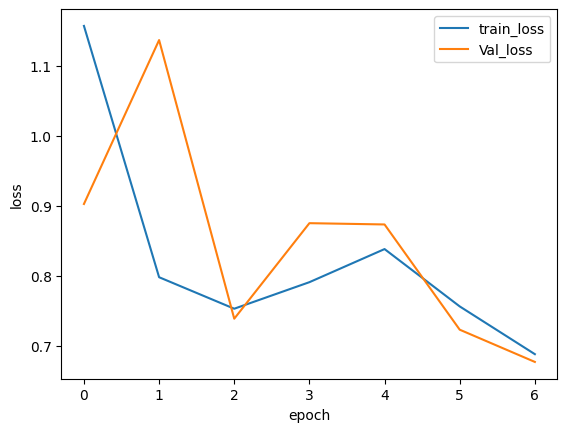

In [188]:
plt.plot(a.history['loss'])
plt.plot(a.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','Val_loss'])


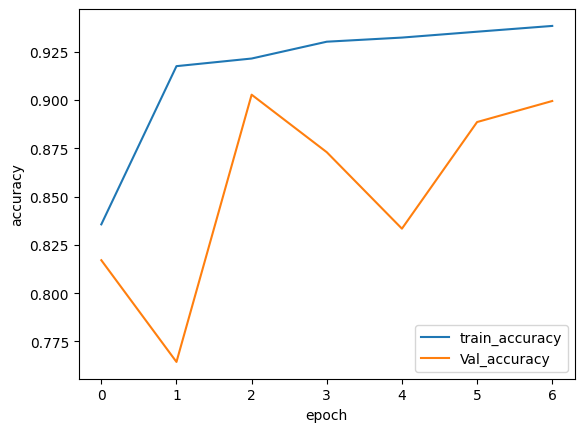

In [189]:
plt.plot(a.history['accuracy'])
plt.plot(a.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_accuracy','Val_accuracy'])

# Model Evaluation 

In [ ]:
test_dataset=test_dataset.map(resizing_reskilling)
test_dataset=test_dataset.batch(1)

In [ ]:
model.evaluate(test_dataset)

2757/2757 [==============================] - 16s 6ms/step - loss: 1156416.7500 - tp: 1361.0000 - fp: 613.0000 - tn: 777.0000 - fn: 6.0000 - accuracy: 0.7755 - precision: 0.6895 - recall: 0.9956 - auc: 0.7773


[1156416.75,
 1361.0,
 613.0,
 777.0,
 6.0,
 0.7754805684089661,
 0.6894630193710327,
 0.9956108331680298,
 0.7773017883300781]

# Confusion matrix and ROC plot

In [ ]:
from sklearn.metrics import confusion_matrix,roc_curve


In [ ]:
labels=[]
input=[]
for x,y in test_dataset.as_numpy_iterator():
    labels.append(y)
    input.append(x)

In [ ]:
print(labels)

[array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64),

In [ ]:

labels=np.array([i[0] for i in labels]) # list compreshension
print(labels)

[1 0 0 ... 1 1 0]


In [ ]:
print(input)

[array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32), array([[[[0., 0., 0.],
         [0., 0., 0.]

In [ ]:
print(np.array(input).shape)

(2757, 1, 224, 224, 3)


In [ ]:
print(np.array(input)[:,0,...].shape)

(2757, 224, 224, 3)


In [ ]:
with tf.device('/CPU:0'):
    prediction=Custom_model.predict(np.array(input)[:,0,...])

87/87 [==============================] - 9s 88ms/step


In [ ]:
print(prediction)

[[0.4985773 ]
 [0.49120918]
 [0.49994814]
 ...
 [0.47135195]
 [0.50364906]
 [0.48843935]]


[[   3 1388]
 [   5 1361]]


Text(0.5, 80.7222222222222, 'Prediction')

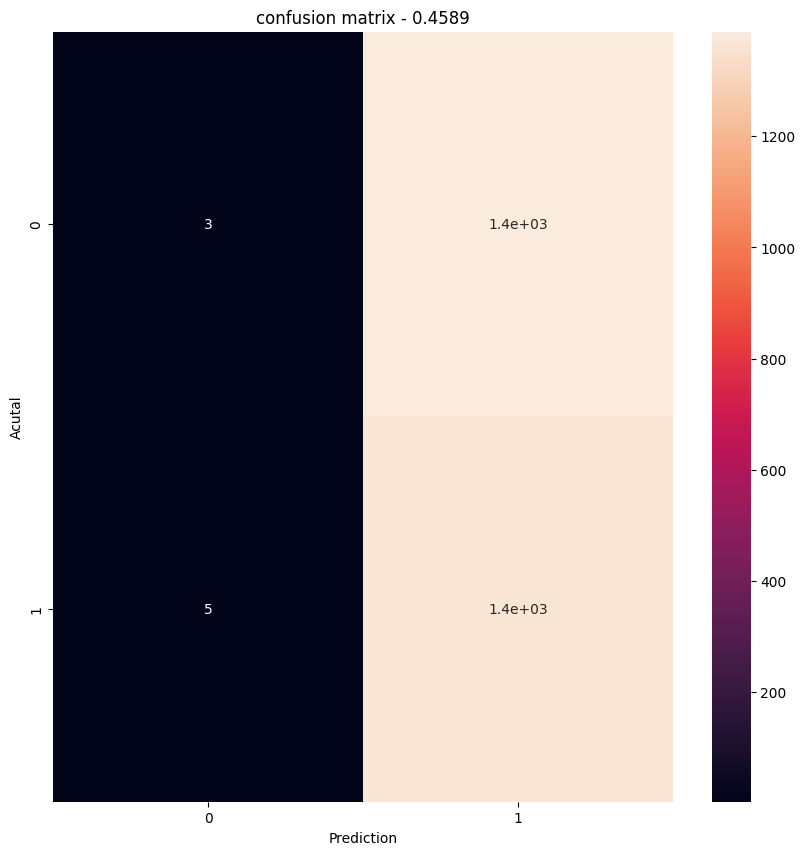

In [ ]:
threshold=0.4589
cm=confusion_matrix(labels,prediction>threshold)
print(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,)
plt.title('confusion matrix - {}'.format(threshold))
plt.ylabel('Acutal')
plt.xlabel('Prediction')


1417 1417 1417


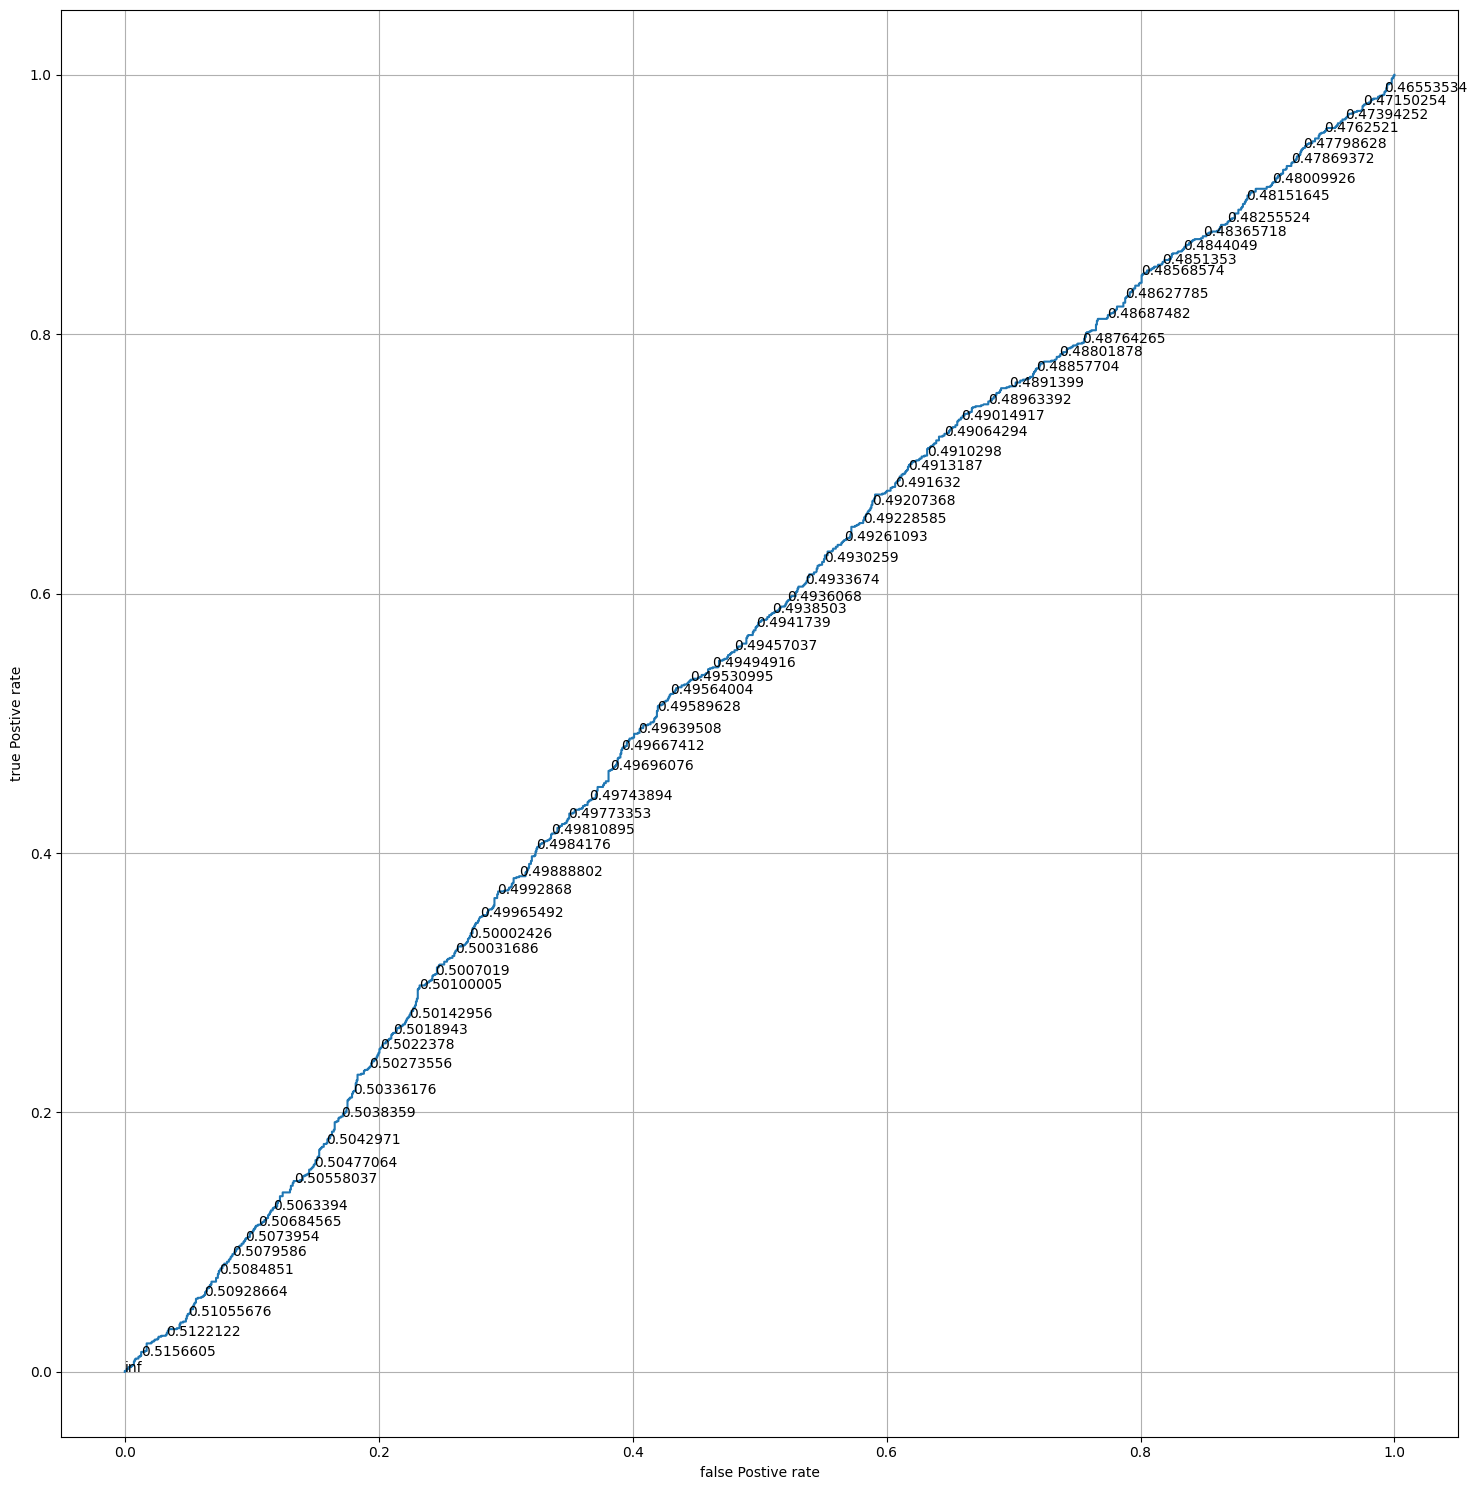

In [ ]:
fp,tp,thresholds=roc_curve(labels,prediction)
print(len(fp),len(tp),len(thresholds))
plt.figure(figsize=(15,15))
plt.plot(fp,tp)
plt.xlabel("false Postive rate")
plt.ylabel("true Postive rate")
plt.grid()
skips=20
for i in range(0,len(thresholds),skips):
    plt.text(fp[i],tp[i],thresholds[i])
plt.tight_layout()


The plt.text method in Matplotlib is used to add text annotations at specific coordinates in a plot. It is part of the matplotlib.pyplot module

In [ ]:
# Custom_model.predict(test_dataset.take(1))[0][0]

In [ ]:
# parasited_or_not(Custom_model.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 0s 30ms/step


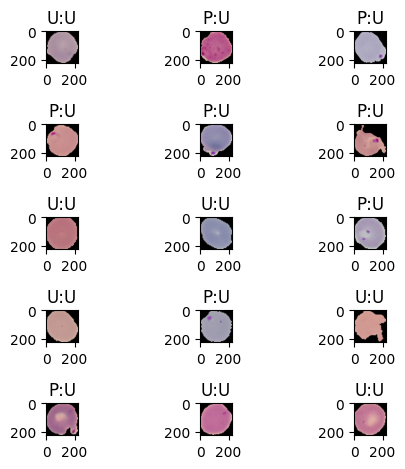

In [ ]:
for i ,(image,label) in enumerate(test_dataset.take(15)):
    ax=plt.subplot(5,3,i+1)
    plt.imshow(image[0])
    plt.title(str(parasited_or_not(label.numpy()[0]))+":"+str(parasited_or_not(lenet_model.predict(image)[0])))
    plt.tight_layout()